In [1]:
import os

# Random Module
import random

# Data manipulation and linear algebra
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2

# Neural network API
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Нур\AppData\Local\Temp\ipykernel_17692\891406967.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as

At first, we notice that the data is about images that were taken to the retina of people that have different eye disease and normal eyes, either left or right eye.
We have 4 classifications:
- Cataracts
- Diabetic_retinopathy
- Glaucoma
- Normal

The porpuse of this notebook is to make an algorithm that can predict what of these different eye disease does the patient have given the image presented

We are going to show some examples of each desease and normal eyes

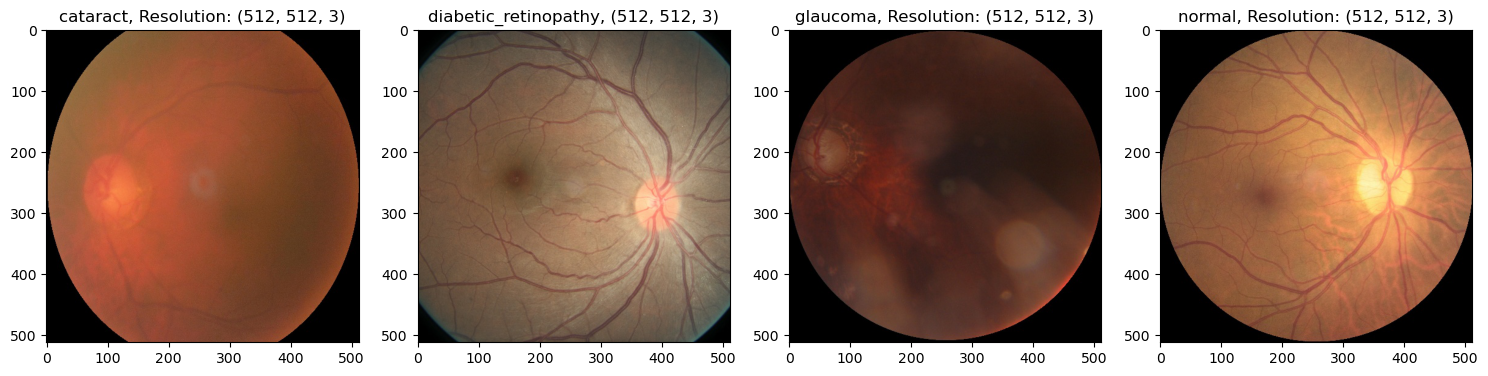

In [3]:
fig, ax = plt.subplots(1,4, figsize=(15,8))
# Cataract Image
cataract_img = mpimage.imread('dataset/normal/2341_left.jpg')
ax[0].imshow(cataract_img)
ax[0].set_title(f'cataract, Resolution: {cataract_img.shape}')

# Diabetic_retinopathy
diabetic_retinopathy_img = mpimage.imread('dataset/diabetic_retinopathy/10009_left.jpeg')
ax[1].imshow(diabetic_retinopathy_img)
ax[1].set_title(f'diabetic_retinopathy, {diabetic_retinopathy_img.shape}')

# Glaucoma Image
glaucoma_img = mpimage.imread('dataset/glaucoma/1213_left.jpg')
ax[2].imshow(glaucoma_img)
ax[2].set_title(f'glaucoma, Resolution: {glaucoma_img.shape}')

# Normal Image
normal_img = mpimage.imread('dataset/normal/2334_right.jpg')
ax[3].imshow(normal_img)
ax[3].set_title(f'normal, Resolution: {normal_img.shape}')

plt.tight_layout()
plt.show()

In [4]:
def save_images(path_dir):
    images = []
    for jpg in os.listdir(path_dir):
        image_high_resolution = cv2.imread(f'{path_dir}/{jpg}')
        image_change_color = cv2.cvtColor(image_high_resolution, cv2.COLOR_BGR2RGB)
        image_low_resolution = cv2.resize(image_change_color, (200, 200))
        images.append(image_low_resolution)
        
    return np.asarray(images)

## Now, we are going to divide the images in carpets of Training and Test

In [5]:
!mkdir ../model && mkdir ../model/Train && mkdir ../model/Test

ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.


In [6]:
# Create de directories for the datasets of Training
!mkdir ../model/Train/cataract && mkdir ../model/Train/glaucoma \
&& mkdir ../model/Train/diabetic_retinopathy && mkdir ../model/Train/normal

ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.


In [7]:
# Create de directories for the datasets of Test
!mkdir ../model/Test/cataract && mkdir ../model/Test/glaucoma \
&& mkdir ../model/Test/diabetic_retinopathy && mkdir ../model/Test/normal

ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.


In [9]:
# Load the images in memory for make carpets thus we can divided in two different sets of data and can perform a better model
cataract_img = save_images('dataset/cataract')
diabetic_retinopathy_img = save_images('dataset/diabetic_retinopathy')
glaucoma_img = save_images('dataset/glaucoma')
normal_img = save_images('dataset/normal')

# Put toguether all the Matrices in one variable
eye_deseases_img = np.concatenate((cataract_img, glaucoma_img, diabetic_retinopathy_img, normal_img)) 
label_eye_deseases = np.concatenate((
    np.repeat(0, cataract_img.shape[0]), # Create Label for Cataract
    np.repeat(1, glaucoma_img.shape[0]), # Create Label for Glaucoma
    np.repeat(2, diabetic_retinopathy_img.shape[0]), # Create Label for Diabetic_retinopathy
    np.repeat(3, normal_img.shape[0]) # Create Label for Normal
))

# Create the dict for the labels
dict_labels_eye_deseases = {0:'cataract', 1:'glaucoma', 2:'diabetic_retinopathy', 3:'normal'}

In [10]:
print(f'''Total number of images: {eye_deseases_img.shape[0]}
        Resolution: {eye_deseases_img.shape[1]} x {eye_deseases_img.shape[2]}
        Channels of Color: {eye_deseases_img.shape[3]} (RGB)''')

Total number of images: 4217
        Resolution: 200 x 200
        Channels of Color: 3 (RGB)


### Now that we have all the data and their labels, we are going to do a split in training and testing and then we will save them in their directories

In [11]:
x_train, x_test, y_train, y_test = train_test_split(eye_deseases_img, label_eye_deseases, 
                                                    test_size=0.30,
                                                   random_state=2184,
                                                   )

In [17]:
def save_images_directories(x, y, dir_set):
    for i in range(x.shape[0]): 
        plt.imsave(f'{dir_set}/{dict_labels_eye_deseases[y[i]]}/{np.random.randint(1000000)}.jpg', x[i]) # Directorie where the image is going to be save, the array
    
save_images_directories(x_train, y_train, 'model/Train') # Save the images in Train directory
save_images_directories(x_test, y_test, 'model/Test') # Save the images in Test directoriy

## Now that we have all the images in their directories, we are going to prepare the data for the CNN MODEL

### First we are going to make a Data generators so that we have more data for training and testing datasets

In [18]:
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                  horizontal_flip=True,
                                  vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  validation_split=0.2)

In [20]:
print('Training Dataset:')
train_generator = train_datagen.flow_from_directory(
    'model/Train',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

print('Validation Dataset:')
validation_generator = test_datagen.flow_from_directory(
    'model/Test',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

print('Test Dataset:')
test_generator = test_datagen.flow_from_directory(
    'model/Test',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb'
)

Training Dataset:
Found 2950 images belonging to 4 classes.
Validation Dataset:
Found 252 images belonging to 4 classes.
Test Dataset:
Found 1266 images belonging to 4 classes.


In [21]:
# Save the classes in a list
classes = list(dict_labels_eye_deseases.values())

In [22]:
def plotimages(images_arr):
    fig, ax = plt.subplots(1, 5, figsize=(10,10))
    for img, axe in zip(images_arr, ax):
        axe.imshow(img)
        axe.axis('off')
    plt.tight_layout()
    plt.show()

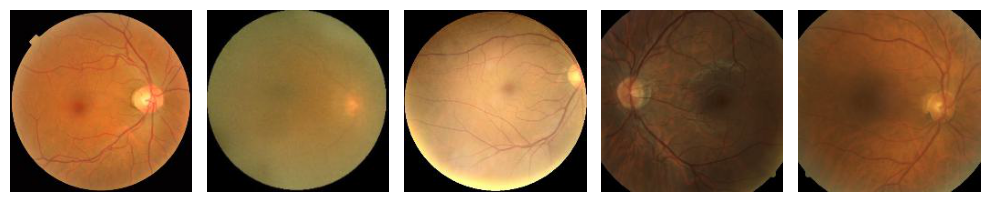

In [23]:
sample_training, _ = next(train_generator)
plotimages(sample_training[:5])

# Now we start with building the Neural Networks
## Considerations:
- We are going to start building the simplest Neural Network since in each iteration of a new model we will add 
- The number of epochs of each model is going to be constant (30)

At the end we are going to save the architecture and weigths of each model so in the end we can compare them.

## Visualization metrics function

In [24]:
def results_visualization(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1, 2) # Create de plots
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(10, 9)
    
    ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    
    ax[1].plot(epochs, train_loss, 'go-', label='Training loss')
    ax[1].plot(epochs, val_loss, 'ro-', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    
    plt.show()

## Callbacks

In [25]:
from tensorflow.keras.callbacks import Callback

def callback_best_model(name_version_model):
    callback_best_model = tf.keras.callbacks.ModelCheckpoint(
                            filepath = f'../results/{name_version_model}',
                            frequency = 'epoch',
                            save_best_only = True,
                            monitor = 'val_accuracy',
                            verbose = 1
                        )
    return callback_best_model

# Create a callback when the model accuracy in training data reached 0.90
class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.90:
            print('The model has reached the accuracy desired (0.90), stop the training!')
            self.model.stop_training = True

## Simplest Neural Network

In [26]:
# We are going to suppress the warnings to the console does not fill with information we do not need 
# because these are mainly resources warnings of the GPU
import warnings
warnings.filterwarnings("ignore")

In [27]:
model_base = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Flatten(input_shape=(200,200,3)),
    
    # Layer 1
    tf.keras.layers.Dense(50, activation='relu'),
    
    # Layer 2
    tf.keras.layers.Dense(100, activation='relu'),
    
    # Output Layer 
    tf.keras.layers.Dense(4, activation='softmax')
]
)

In [28]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 50)                6000050   
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 6,005,554
Trainable params: 6,005,554
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model with the require settings
model_base.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
history = model_base.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callback_best_model('simple_model.h5')]
)

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 0.7876 - accuracy: 0.6359
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to ../results\simple_model.h5
24/24 [==============================] - 5s 215ms/step - loss: 0.7876 - accuracy: 0.6359 - val_loss: 0.6916 - val_accuracy: 0.6667
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 0.8407 - accuracy: 0.6437
Epoch 2: val_accuracy did not improve from 0.66667
24/24 [==============================] - 5s 209ms/step - loss: 0.8407 - accuracy: 0.6437 - val_loss: 1.1870 - val_accuracy: 0.5913
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.9487 - accuracy: 0.6075
Epoch 3: val_accuracy did not improve from 0.66667
24/24 [==============================] - 5s 207ms/step - loss: 0.9487 - accuracy: 0.6075 - val_loss: 0.6542 - val_accuracy: 0.6667
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.7507 - accuracy: 0.6569
Epoch 4: val_accuracy improved fr

In [37]:
results = model_base.evaluate(test_generator)

10/10 [==============================] - 2s 169ms/step - loss: 0.6103 - accuracy: 0.7417


In [41]:
test_generator

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_base)
tf_con=converter.convert()

with open("model.tflite","wb") as f:
    f.write(tf_con)

INFO:tensorflow:Assets written to: C:\Users\4978~1\AppData\Local\Temp\tmp3pnjb726\assets


INFO:tensorflow:Assets written to: C:\Users\4978~1\AppData\Local\Temp\tmp3pnjb726\assets


### We have with this model an accuracy of 71% in the test data

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

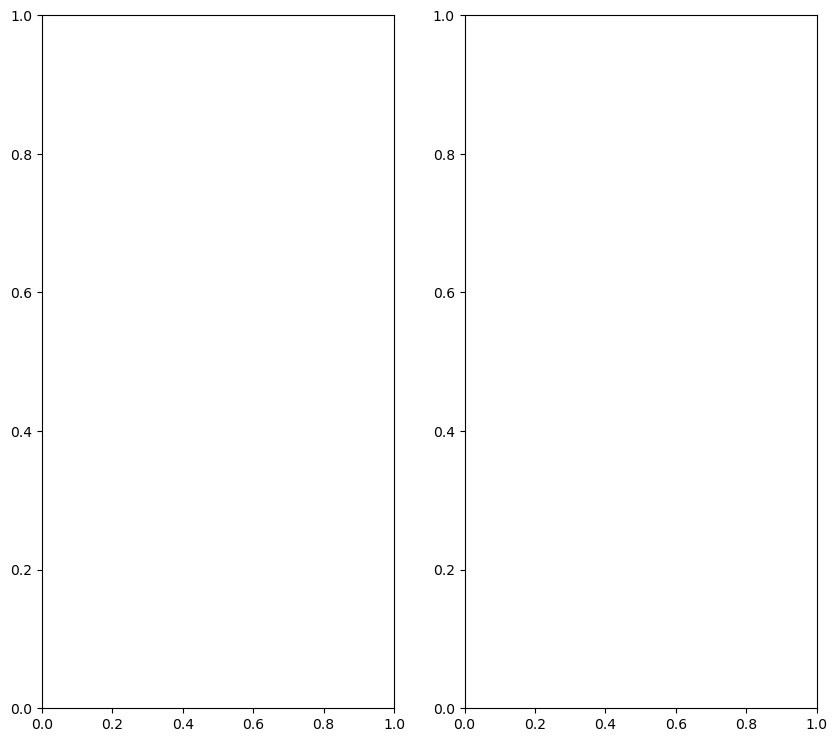

In [35]:
results_visualization(history)

#### In the plots above we can see that we have highest value in the validation accuracy metric was 75%, but we have some bias problems because the accuracy in the training data and validation data are distanced, this is not bad but we are going to try to make this metric better by adding some improvements to the model.

# Second model 
In this model we are going to add some regularization like Dropout and regularizers to the layers to reduce the distance between the accuracy values of the training and validation data

In [25]:
model_optimize = tf.keras.models.Sequential([
    # Input layer 
    tf.keras.layers.Flatten(input_shape=(200,200,3)),
    
    # Layer 1
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5) ), # Correlated values
    tf.keras.layers.Dropout(0.2), # "Turn off" the 20% of the neurons
    
    # Layer 2
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
    tf.keras.layers.Dropout(0.2), # "Turn off" the 20% of the neurons  
    
    # Output Layer
    tf.keras.layers.Dense(4, activation='softmax')
]
)

model_optimize.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               15360128  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 15,394,180
Trainable params: 15,394,180
Non-trainable params: 0
__________________________________________

In [26]:
# Compile the model with the require settings
model_optimize.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
history_optimizer = model_optimize.fit(
    train_generator,
    epochs=20,
    validation_data = test_generator,
    callbacks=[callback_best_model('optimize_model.h5')]
)

Epoch 1/20
24/24 [==============================] - 9s 380ms/step - loss: 7.8536 - accuracy: 0.3638 - val_loss: 1.3380 - val_accuracy: 0.3684

Epoch 00001: val_accuracy improved from -inf to 0.36838, saving model to ../results/optimize_model.h5
Epoch 2/20
24/24 [==============================] - 9s 374ms/step - loss: 1.3139 - accuracy: 0.4109 - val_loss: 1.2332 - val_accuracy: 0.4783

Epoch 00002: val_accuracy improved from 0.36838 to 0.47826, saving model to ../results/optimize_model.h5
Epoch 3/20
24/24 [==============================] - 9s 373ms/step - loss: 1.2540 - accuracy: 0.4510 - val_loss: 1.3348 - val_accuracy: 0.4221

Epoch 00003: val_accuracy did not improve from 0.47826
Epoch 4/20
24/24 [==============================] - 9s 362ms/step - loss: 1.2518 - accuracy: 0.4092 - val_loss: 1.1791 - val_accuracy: 0.4308

Epoch 00004: val_accuracy did not improve from 0.47826
Epoch 5/20
24/24 [==============================] - 9s 359ms/step - loss: 1.1722 - accuracy: 0.4527 - val_loss:

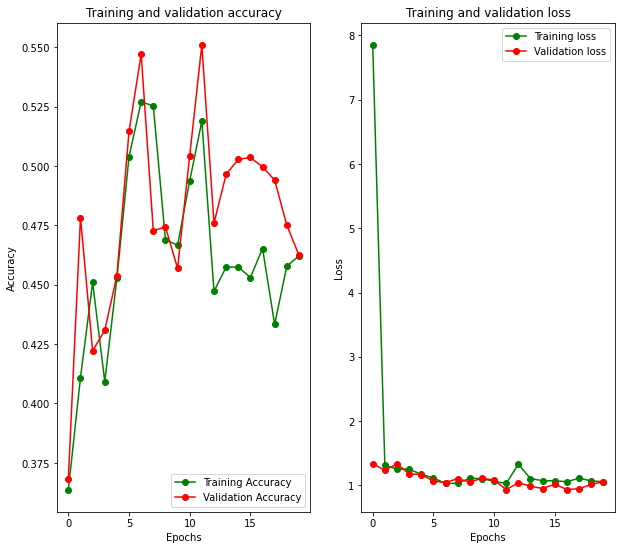

In [28]:
results_visualization(history_optimizer)

# Third model

Now we are going to apply a Convolutional Neural Network because this are images and a CNN is one of the best Neural Network for this case

In [29]:
cnn_model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Conv2D(40, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    # Layer 2
    tf.keras.layers.Conv2D(50, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # Layer 3
    tf.keras.layers.Conv2D(60, (3,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.1),
    
    # Layer 4
    tf.keras.layers.Conv2D(70,(3,3), kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    # Flatten layer
    tf.keras.layers.Flatten(),
    
    # Output layer
    tf.keras.layers.Dense(4, activation='softmax')
])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 40)      1120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 50)        18050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 60)        27060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 60)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 47, 47, 60)       

In [30]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_best_model('cnn_model.h5')],
    validation_data = validation_generator
)

Epoch 1/20
24/24 [==============================] - 16s 336ms/step - loss: 1.3302 - accuracy: 0.3957 - val_loss: 1.1516 - val_accuracy: 0.4802

Epoch 00001: val_accuracy improved from -inf to 0.48016, saving model to ../results/cnn_model.h5
Epoch 2/20
24/24 [==============================] - 7s 299ms/step - loss: 1.0043 - accuracy: 0.5460 - val_loss: 0.9887 - val_accuracy: 0.5476

Epoch 00002: val_accuracy improved from 0.48016 to 0.54762, saving model to ../results/cnn_model.h5
Epoch 3/20
24/24 [==============================] - 8s 312ms/step - loss: 0.9102 - accuracy: 0.5843 - val_loss: 0.8671 - val_accuracy: 0.6151

Epoch 00003: val_accuracy improved from 0.54762 to 0.61508, saving model to ../results/cnn_model.h5
Epoch 4/20
24/24 [==============================] - 8s 326ms/step - loss: 0.8308 - accuracy: 0.6264 - val_loss: 0.7992 - val_accuracy: 0.7222

Epoch 00004: val_accuracy improved from 0.61508 to 0.72222, saving model to ../results/cnn_model.h5
Epoch 5/20
24/24 [============

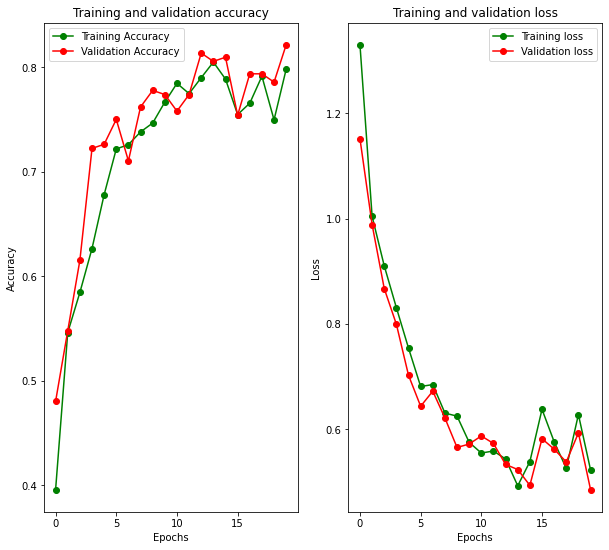

In [32]:
results_visualization(cnn_history)

# Model Tunning
### We can observe that this model outperforms the other but we can still do some hyperparameter tunning to the parameters so we can se witch model is the better for this data

In [33]:
import keras_tuner as kt
from tensorflow import keras

In [34]:
def model_constructor(hp):
    model = tf.keras.models.Sequential()
    
    # Input layer
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', input_shape=(200,200,3)))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.BatchNormalization())
    
    # The number of filters is going to be a variable in this case
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    
    hp_padding = hp.Choice('padding', values=['same', 'valid'])
    
    # Layer 2
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.BatchNormalization())
    
    # Layer 3
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu' ,kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.BatchNormalization())
    
    # Layer 4
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.BatchNormalization())
    
    # Layer 5
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.20))
    
    # Layer 6
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding=hp_padding, activation=None))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.BatchNormalization())
    
    
    # Flatten layer
    model.add(tf.keras.layers.Flatten())
    
    # Output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    
    # The number of the learning rate is going to be a variable in this case
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate), loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [35]:
# Set the tunner

tunner = kt.Hyperband(
    model_constructor,
    objective = 'val_accuracy',
    max_epochs=20,
    factor=3,
    directory='../results',
    project_name='eye-desease-tunner',
    overwrite=True
)

In [36]:
# Make the search
tunner.search(
    train_generator,
    epochs=20,
    validation_data=validation_generator
    
)

best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 02m 28s]
val_accuracy: 0.5317460298538208

Best val_accuracy So Far: 0.670634925365448
Total elapsed time: 00h 30m 31s


In [37]:
# Get the best configuration of the model that give the highest accuracy

print('The Hyperparameters that give the highest accuracy are:')

print(f"Units: {best_hps.get('units')}")

print(f"Learining rate: {best_hps.get('learning_rate')}")

The Hyperparameters that give the highest accuracy are:
Units: 64
Learining rate: 0.01


In [38]:
# The model with the highest accuracy after the tunning  process

hypermodel = tunner.hypermodel.build(best_hps)

hypermodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 197, 197, 64)      3136      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 65, 65, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 65, 65, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 65, 65, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 65, 65, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 65, 65, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 64)       

In [39]:
# Now that we have the that give us the highesr val_accuracy, we are going to train the model with those hyper parameters
history_hypermodel = hypermodel.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks = [callback_best_model('tunnig_model.h5')]
)

Epoch 1/20
24/24 [==============================] - 9s 326ms/step - loss: 9.4181 - accuracy: 0.3390 - val_loss: 660.8807 - val_accuracy: 0.2778

Epoch 00001: val_accuracy improved from -inf to 0.27778, saving model to ../results/tunnig_model.h5
Epoch 2/20
24/24 [==============================] - 7s 321ms/step - loss: 3.7745 - accuracy: 0.4031 - val_loss: 23.6052 - val_accuracy: 0.3413

Epoch 00002: val_accuracy improved from 0.27778 to 0.34127, saving model to ../results/tunnig_model.h5
Epoch 3/20
24/24 [==============================] - 7s 308ms/step - loss: 3.2145 - accuracy: 0.4421 - val_loss: 29.5010 - val_accuracy: 0.2302

Epoch 00003: val_accuracy did not improve from 0.34127
Epoch 4/20
24/24 [==============================] - 8s 312ms/step - loss: 2.5516 - accuracy: 0.4669 - val_loss: 7.3770 - val_accuracy: 0.3214

Epoch 00004: val_accuracy did not improve from 0.34127
Epoch 5/20
24/24 [==============================] - 7s 307ms/step - loss: 2.3519 - accuracy: 0.4835 - val_loss:

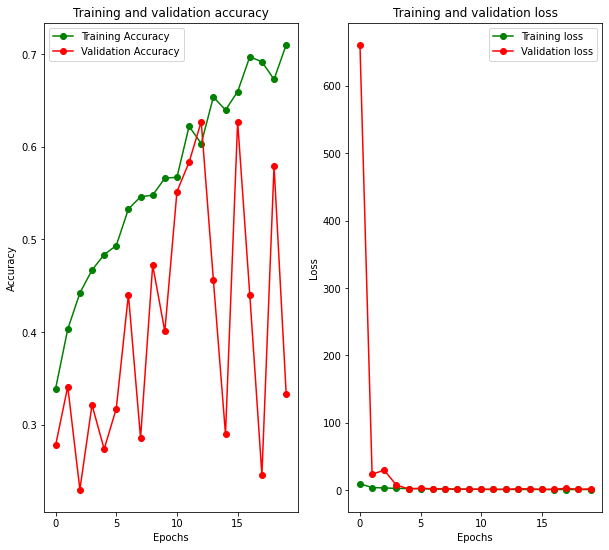

In [40]:
results_visualization(history_hypermodel)

### We have reached a good model that in the best epoch the accuracy for the test set was 87.92%, so we are going to save the model

In [41]:
print(f'Accuracy in the validation set: {hypermodel.evaluate(test_generator)[1]}')

10/10 [==============================] - 3s 322ms/step - loss: 1.8393 - accuracy: 0.3383
Accuracy in the validation set: 0.3383399248123169


# Load the model

In [42]:
# Load the best model
tunning_model = tf.keras.models.load_model('../results/tunnig_model.h5')

In [43]:
print(f'Accuracy in the validation set: {tunning_model.evaluate(test_generator)[1]}')

10/10 [==============================] - 3s 265ms/step - loss: 1.0960 - accuracy: 0.6063
Accuracy in the validation set: 0.6063241362571716


### That last model give us the best accuracy in the validation dataset so far

# Transfer Learning

### Mobilnet V1

In [44]:
# Adapt the data 
print('Training Dataset:')
train_generator = train_datagen.flow_from_directory(
    '../model/Train',
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

print('Validation Dataset:')
validation_generator = test_datagen.flow_from_directory(
    '../model/Test',
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

print('Test Dataset:')
test_generator = test_datagen.flow_from_directory(
    '../model/Test',
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb'
)

Training Dataset:
Found 2947 images belonging to 4 classes.
Validation Dataset:
Found 252 images belonging to 4 classes.
Test Dataset:
Found 1265 images belonging to 4 classes.


In [45]:
# Make sure that the model is loaded in our enviroment
!ls '/kaggle/input/mobilenet-v1/tensorflow2/100-224-classification/2'

saved_model.pb	variables


In [46]:
import tensorflow as tf
import tensorflow_hub as hub

model_hub = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224,224,3)),
    hub.KerasLayer('/kaggle/input/mobilenet-v1/tensorflow2/100-224-classification/2',
                  trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])


model_hub.build([None, 224, 224, 3])  # Batch input shape.
model_hub.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              4254889   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4008      
Total params: 4,258,897
Trainable params: 4,008
Non-trainable params: 4,254,889
_________________________________________________________________


In [47]:
model_hub.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_hub = model_hub.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
24/24 [==============================] - 11s 383ms/step - loss: 2.0064 - accuracy: 0.5025 - val_loss: 0.8040 - val_accuracy: 0.7103
Epoch 2/5
24/24 [==============================] - 8s 342ms/step - loss: 1.3032 - accuracy: 0.6512 - val_loss: 0.7284 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - 8s 344ms/step - loss: 1.1165 - accuracy: 0.6885 - val_loss: 0.7522 - val_accuracy: 0.7659
Epoch 4/5
24/24 [==============================] - 9s 357ms/step - loss: 1.0809 - accuracy: 0.7011 - val_loss: 0.6965 - val_accuracy: 0.8056
Epoch 5/5
24/24 [==============================] - 9s 374ms/step - loss: 0.9693 - accuracy: 0.7150 - val_loss: 0.6830 - val_accuracy: 0.7659


In [48]:
print(f'Accuracy mobilnet model: {model_hub.evaluate(test_generator)[1]}')

10/10 [==============================] - 4s 353ms/step - loss: 0.6504 - accuracy: 0.7700
Accuracy mobilnet model: 0.7699604630470276


### Inception V3

In [49]:
# Adapt the data 
print('Training Dataset:')
train_generator = train_datagen.flow_from_directory(
    '../model/Train',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

print('Validation Dataset:')
validation_generator = test_datagen.flow_from_directory(
    '../model/Test',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

print('Test Dataset:')
test_generator = test_datagen.flow_from_directory(
    '../model/Test',
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb'
)

Training Dataset:
Found 2947 images belonging to 4 classes.
Validation Dataset:
Found 252 images belonging to 4 classes.
Test Dataset:
Found 1265 images belonging to 4 classes.


In [50]:
# Make sure that the model is loaded in our enviroment
!ls '/kaggle/input/inception-v3/tensorflow2/tf2-preview-classification/4'

saved_model.pb	variables


In [51]:
import tensorflow as tf
import tensorflow_hub as hub

model_hub = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(150,150,3)),
    hub.KerasLayer('/kaggle/input/inception-v3/tensorflow2/tf2-preview-classification/4',
                  trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])


model_hub.build([None, 150, 150, 3])  # Batch input shape.
model_hub.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
flatten_3 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4008      
Total params: 23,857,841
Trainable params: 4,008
Non-trainable params: 23,853,833
_________________________________________________________________


In [52]:
model_hub.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_hub = model_hub.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
24/24 [==============================] - 12s 303ms/step - loss: 2.3056 - accuracy: 0.4778 - val_loss: 1.1345 - val_accuracy: 0.6310
Epoch 2/5
24/24 [==============================] - 6s 252ms/step - loss: 1.6500 - accuracy: 0.5918 - val_loss: 1.1478 - val_accuracy: 0.6587
Epoch 3/5
24/24 [==============================] - 6s 228ms/step - loss: 1.4455 - accuracy: 0.6193 - val_loss: 0.9444 - val_accuracy: 0.6825
Epoch 4/5
24/24 [==============================] - 6s 236ms/step - loss: 1.2671 - accuracy: 0.6464 - val_loss: 1.0238 - val_accuracy: 0.6905
Epoch 5/5
24/24 [==============================] - 6s 228ms/step - loss: 1.2064 - accuracy: 0.6620 - val_loss: 0.8580 - val_accuracy: 0.7024


### The model of transfer learning that give us the highest accuracy is the mobilnet V1 with just 5 epochs

# Tensorborad results:

Cnn model: https://tensorboard.dev/experiment/fGnAHxq2Qey8JbphqI1mGQ/#scalars&_smoothingWeight=0.68